# FLOWERS IMAGE PROCESSING 🌸 #

## MAIN LIBRARIES 📚 ##

 - os: The library is used for loading the images of the dataset into the code.
 - numpy: The library is used for keeping the images of the dataset and for computing features of the images.
 - pandas: The library is used for analyzing the features, as well as for keeping the features and analysis.
 - Image: The library is used for converting the images into arrays and resizing them.
 - matplotlib.pyplot: The library is used for visualizing the analysis of the images.
 - spicy.stats: The library is used for extracting a specific feature from the images, skew.

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import skew

## DATALOADER 🌺 ##

#### DataLoader class takes the folder of the dataset as its initial argument and converts each image of the dataset into a numpy array of 128x128 size, storing the RGB values of each pixel of the image. ####
1. Methods defined:
- `__init__(self, folder: str)`
    Takes as an input the path of the folder, generates the loader by going through each image, checking the extension and the size of the image, converting the image an array with RGB values of each pixel, and storing them in a numpy array. 
    - Input - the path of the folder
    - Output - none
- `_get_images(self) → List[np.ndarray]`
    Returns the numpy array containing all the converted images.
    - Input - none
    - Output - numpy array
- `display_array(self) → None`
    Renders the stored NumPy image array(s) inline in a Jupyter/IPython notebook cell.
    - Input – none
    - Output – displays the NumPy array.
    2. Functions used from external libraries:
- `os.listdir()` 
    Lists all entries (file and folder names) in the directory at self.__folder.
- `os.path.join()`
    Safely concatenates a directory path and filename into a full file path.
- `Image.open()`
    Opens an image file from disk, returning a PIL image object.
- `PIL.Image.Image.convert()` 
    Converts the image to the RGB mode.
- `PIL.Image.Image.resize()` 
    Rescales the image to the given dimensions.
- `np.array()`
    Transforms the PIL image (or list of images) into a NumPy array for pixel-level processing.


In [2]:
class DataLoader:
    def __init__(self, folder):
        self.__imgs = []
        self.__folder = folder
        for image in os.listdir(self.__folder):
            if image.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img_path = os.path.join(self.__folder, image)
                img = Image.open(img_path).convert("RGB")
                img = img.resize((128,128))
                np_img = np.array(img)
                self.__imgs.append(np_img)

        self.__np_images = np.array(self.__imgs)

    def _get_images(self):
        return self.__np_images
    
    def display_array(self):
        display(self.__np_images)

In [3]:
dl = DataLoader(r"D:\Downloads\flowers")
dl.display_array()

array([[[[ 13,  22,  10],
         [ 14,  23,   9],
         [ 16,  24,  10],
         ...,
         [128, 143,  78],
         [134, 148,  85],
         [125, 140,  78]],

        [[ 15,  21,  10],
         [ 14,  23,   9],
         [ 17,  25,  11],
         ...,
         [126, 152,  81],
         [146, 170,  96],
         [139, 158,  94]],

        [[ 16,  24,  10],
         [ 17,  25,  11],
         [ 17,  25,  12],
         ...,
         [ 48,  72,  32],
         [112, 139,  67],
         [135, 157,  88]],

        ...,

        [[ 92,  75,  56],
         [ 97,  78,  58],
         [ 98,  79,  58],
         ...,
         [ 76,  61,  44],
         [ 69,  52,  40],
         [ 54,  44,  37]],

        [[ 90,  75,  56],
         [ 94,  77,  57],
         [ 97,  79,  59],
         ...,
         [ 63,  46,  38],
         [ 38,  30,  22],
         [ 87,  61,  57]],

        [[ 89,  73,  55],
         [ 96,  77,  58],
         [ 99,  80,  61],
         ...,
         [ 59,  38,  38],
        

## FEATURE EXTRACTOR 🪷 ##


#### FeatureExtractor class inherits from the DataLoader class and extracts various statistical features from a dataset of RGB images stored as NumPy arrays.

1. **Methods defined:**

* `__init__(self, folder)`
  Initializes the FeatureExtractor by first calling the parent DataLoader’s initializer to load and convert the images, then stores the result and prepares an empty DataFrame to hold extracted features.

  * Input: path to the dataset folder
  * Output: none

* `_extract_mean_red(self)`
  Calculates the average intensity of the red channel (channel index 0) for each image and stores the result as a new column.

  * Input: none
  * Output: none

* `_extract_mean_green(self)`
  Calculates the average intensity of the green channel (channel index 1) for each image.

  * Input: none
  * Output: none

* `_extract_mean_blue(self)`
  Calculates the average intensity of the blue channel (channel index 2) for each image.

  * Input: none
  * Output: none

* `_extract_overall_mean(self)`
  Computes the mean of all pixel values (across all three channels) per image.

  * Input: none
  * Output: none

* `_extract_std_dev_overall(self)`
  Computes the overall standard deviation of pixel values for each image to measure variability.

  * Input: none
  * Output: none

* `_extract_contrast(self)`
  Measures the contrast of each image as the difference between the maximum and minimum pixel values.

  * Input: none
  * Output: none

* `_extract_skewness(self)`
  Calculates the skewness of the pixel value distribution across all channels for each image. Positive skewness indicates a bias toward brighter pixels, while negative skewness indicates darker ones.

  * Input: none
  * Output: none

* `extract_all_features(self)`
  Runs all individual feature extraction methods sequentially and returns the full feature DataFrame.

  * Input: none
  * Output: pandas DataFrame with all extracted features

* `_get_features(self)`
  Internal method to return the current DataFrame of extracted features.

  * Input: none
  * Output: pandas DataFrame

2. **Functions used from external libraries:**

* `np.mean()`
  Computes the mean along specified axes of the image array.
* `np.std()`
  Calculates standard deviation across image pixels and channels.
* `np.max()`, `np.min()`
  Extract the highest and lowest pixel values to assess contrast.
* `skew()` (from `scipy.stats`)
  Measures asymmetry in the distribution of pixel intensities.
* `pd.DataFrame()`
  Used to structure and store the computed image features.


In [4]:
class FeatureExtractor(DataLoader):
    def __init__(self, folder):
        super().__init__(folder)
        self._images = self._get_images()
        self.__features = pd.DataFrame()

    def _extract_mean_red(self):
        red_means = np.mean(self._images[:, :, :, 0], axis=(1,2)) 
        self.__features['mean_red'] = red_means

    def _extract_mean_green(self):
        green_means = np.mean(self._images[:, :, :, 1], axis=(1,2)) 
        self.__features['mean_green'] = green_means

    def _extract_mean_blue(self):
        blue_means = np.mean(self._images[:, :, :, 2], axis=(1,2)) 
        self.__features['mean_blue'] = blue_means

    def _extract_overall_mean(self):
        overall_means = np.mean(self._images, axis=(1,2,3)) 
        self.__features['overall_mean'] = overall_means

    def _extract_std_dev_overall(self):
        overall_std_devs = np.std(self._images, axis=(1,2,3))
        self.__features['std_dev_overall'] = overall_std_devs

    def _extract_contrast(self):
        contrasts = np.max(self._images, axis=(1, 2, 3)) - np.min(self._images, axis=(1, 2, 3))
        self.__features['contrast'] = contrasts

    def _extract_skewness(self):
        flattened = self._images.reshape(self._images.shape[0], -1)
        skewness = skew(flattened, axis=1)
        self.__features['skewness'] = skewness

    def extract_all_features(self):
        self._extract_skewness()
        self._extract_mean_red()
        self._extract_mean_green()
        self._extract_mean_blue()
        self._extract_overall_mean()
        self._extract_std_dev_overall()
        self._extract_contrast()
        
        return self._get_features()
    
    def _get_features(self):
        return self.__features


In [5]:
features = FeatureExtractor(r"D:\Downloads\flowers")
features.extract_all_features()

,skewness,mean_red,mean_green,mean_blue,overall_mean,std_dev_overall,contrast
0,0.985225,123.988342,63.067017,64.290466,83.781942,69.595871,255
1,0.117775,139.813354,78.890320,135.114868,117.939514,72.907400,255
2,1.326194,126.881531,80.824036,26.115723,77.940430,68.724649,255
3,-0.333326,167.205078,108.753113,135.797913,137.252035,55.660709,246
4,0.277532,170.851807,76.171021,92.538025,113.186951,83.501972,255
...,...,...,...,...,...,...,...
205,0.378953,111.139160,135.963989,49.098938,98.734029,72.785466,255
206,0.236386,126.014587,90.692505,106.060669,107.589254,77.263374,255
207,0.567435,94.274902,90.411560,84.704895,89.797119,88.467376,255
208,0.572457,115.427673,110.416443,110.744263,112.196126,60.603513,255


## DATA ANALYZER 🌷 ##


DataAnalyzer class inherits from FeatureExtractor and performs statistical analysis on extracted features using pandas. It computes various metrics and relationships between image characteristics. 
1. Methods defined:
- `_descriptive_stats(self)`
    Generates summary statistics (count, mean, std, min, max etc.) for all features using pandas describe().
    - Input - none
    - Output - pandas DataFrame with statistical summary
    
- `_correlations(self)`
    Calculates Pearson correlation matrix between different features to identify relationships.
    - Input - none
    - Output - correlation matrix DataFrame

- `_add_dominant_color_column(self)`
    Creates new 'dominant_color' column by comparing mean RGB values and applying color labels.
    - Input - none
    - Output - modified DataFrame with dominant color labels

- `_compare_brightness_by_color(self)`
    Groups data by dominant color and calculates average brightness for each color group.
    - Input - none
    - Output - DataFrame with brightness comparisons

- `_add_color_contribution(self)`
    Computes relative contribution ratios of each color channel to overall intensity.
    - Input - none
    - Output - DataFrame with new ratio columns

- `display_analysis(self)`
    Executes all analysis methods and displays results using IPython display.
    - Input - none
    - Output - visual output in notebook

2. Functions used from external libraries:
- `pd.DataFrame.describe()`
    Generates descriptive statistics for DataFrame columns
    
- `pd.DataFrame.corr()`
    Computes pairwise correlation of columns
    
- `pd.DataFrame.idxmax()`
    Finds column name with maximum value for each row
    
- `pd.DataFrame.groupby()`
    Groups data by specified column for aggregate calculations
    
- `pd.core.groupby.DataFrameGroupBy.mean()`
    Calculates mean values for grouped data
    


In [6]:
class DataAnalyzer(FeatureExtractor):
    def __init__(self, folder):
        super().__init__(folder)
        self.__df = self.extract_all_features()
        self.__analysis = {}
    
    def _descriptive_stats(self):
        self.__analysis['Descriptive Statistics'] = self.__df.describe()
        return self.__analysis['Descriptive Statistics']
    
    def _correlations(self):
        self.__analysis['Correlations'] = self.__df.corr()
        return self.__analysis['Correlations']
    
    def _add_dominant_color_column(self):
        self.__df['dominant_color'] = self.__df[['mean_red', 'mean_green', 'mean_blue']].idxmax(axis=1)
        self.__df['dominant_color'] = self.__df['dominant_color'].apply(lambda x:"Red" if x=="mean_red" else("Blue" if x=="mean_blue" else "Green"))
        return self.__df
    
    def _compare_brightness_by_color(self):
        self.__analysis['Brightness by Color'] = self.__df.groupby('dominant_color')['overall_mean'].mean().reset_index(name="Brightness")
        return self.__analysis['Brightness by Color']
    
    def _add_color_contribution(self):
        self.__df['red_overall_ratio'] = self.__df['mean_red'] / (self.__df['mean_red']+self.__df['mean_green']+self.__df['mean_blue']) *100
        self.__df['green_overall_ratio'] = self.__df['mean_green'] / (self.__df['mean_red']+self.__df['mean_green']+self.__df['mean_blue'])*100
        self.__df['blue_overall_ratio'] = self.__df['mean_blue'] / (self.__df['mean_red']+self.__df['mean_green']+self.__df['mean_blue'])*100
        return self.__df
    
    def _compute_analysis(self):
        self._descriptive_stats()
        self._correlations()
        self._add_dominant_color_column()
        self._add_color_contribution()
        self._compare_brightness_by_color()

    def display_analysis(self):
        display(self._descriptive_stats())
        display(self._correlations())
        display(self._add_dominant_color_column())
        display(self._add_color_contribution())
        display(self._compare_brightness_by_color())
        
    def _get_analysis(self):
        if not self.__analysis:
            self._compute_analysis()  
        return self.__df, self.__analysis
    
    


In [7]:
da = DataAnalyzer(r"D:\Downloads\flowers")
da.display_analysis()

,skewness,mean_red,mean_green,mean_blue,overall_mean,std_dev_overall,contrast
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.610713,112.765158,101.495634,79.245954,97.835582,69.359628,252.976190
std,0.399212,24.276317,22.877249,29.652225,19.138486,8.709459,5.867305
min,-0.588972,63.498352,44.304871,14.546997,60.974141,50.170054,222.000000
25%,0.348944,96.131393,83.383438,58.905472,82.294963,62.503054,255.000000
50%,0.606071,111.992432,99.463226,80.420044,96.703156,69.614734,255.000000
75%,0.902783,127.819656,117.029816,99.138123,110.964513,75.243695,255.000000
max,1.473888,184.897766,161.099121,150.122375,148.882263,93.268797,255.000000


,skewness,mean_red,mean_green,mean_blue,overall_mean,std_dev_overall,contrast
skewness,1.000000,-0.513464,-0.620571,-0.804241,-0.879720,0.170533,0.100896
mean_red,-0.513464,1.000000,0.244021,0.340034,0.695660,-0.149720,0.223834
mean_green,-0.620571,0.244021,1.000000,0.400952,0.708699,-0.516185,0.043235
mean_blue,-0.804241,0.340034,0.400952,1.000000,0.819983,-0.212942,-0.010160
overall_mean,-0.879720,0.695660,0.708699,0.819983,1.000000,-0.378953,0.106621
std_dev_overall,0.170533,-0.149720,-0.516185,-0.212942,-0.378953,1.000000,0.022168
contrast,0.100896,0.223834,0.043235,-0.010160,0.106621,0.022168,1.000000


,skewness,mean_red,mean_green,mean_blue,overall_mean,std_dev_overall,contrast,dominant_color
0,0.985225,123.988342,63.067017,64.290466,83.781942,69.595871,255,Red
1,0.117775,139.813354,78.890320,135.114868,117.939514,72.907400,255,Red
2,1.326194,126.881531,80.824036,26.115723,77.940430,68.724649,255,Red
3,-0.333326,167.205078,108.753113,135.797913,137.252035,55.660709,246,Red
4,0.277532,170.851807,76.171021,92.538025,113.186951,83.501972,255,Red
...,...,...,...,...,...,...,...,...
205,0.378953,111.139160,135.963989,49.098938,98.734029,72.785466,255,Green
206,0.236386,126.014587,90.692505,106.060669,107.589254,77.263374,255,Red
207,0.567435,94.274902,90.411560,84.704895,89.797119,88.467376,255,Red
208,0.572457,115.427673,110.416443,110.744263,112.196126,60.603513,255,Red


,skewness,mean_red,mean_green,mean_blue,overall_mean,std_dev_overall,contrast,dominant_color,red_overall_ratio,green_overall_ratio,blue_overall_ratio
0,0.985225,123.988342,63.067017,64.290466,83.781942,69.595871,255,Red,49.329780,25.091730,25.578490
1,0.117775,139.813354,78.890320,135.114868,117.939514,72.907400,255,Red,39.515553,22.296830,38.187617
2,1.326194,126.881531,80.824036,26.115723,77.940430,68.724649,255,Red,54.264319,34.566585,11.169095
3,-0.333326,167.205078,108.753113,135.797913,137.252035,55.660709,246,Red,40.607796,26.412022,32.980182
4,0.277532,170.851807,76.171021,92.538025,113.186951,83.501972,255,Red,50.315519,22.432215,27.252265
...,...,...,...,...,...,...,...,...,...,...,...
205,0.378953,111.139160,135.963989,49.098938,98.734029,72.785466,255,Green,37.521397,45.902441,16.576162
206,0.236386,126.014587,90.692505,106.060669,107.589254,77.263374,255,Red,39.041875,28.098378,32.859747
207,0.567435,94.274902,90.411560,84.704895,89.797119,88.467376,255,Red,34.995519,33.561418,31.443063
208,0.572457,115.427673,110.416443,110.744263,112.196126,60.603513,255,Red,34.293422,32.804592,32.901986


,dominant_color,Brightness
0,Blue,117.097090
1,Green,95.267976
2,Red,97.788411


## DATA VISUALIZER 🪻 ##

#### DataVisualizer class extends DataAnalyzer and creates various charts to visualize flower color data analysis results. ####
1. Methods defined:
- `__init__(self, folder: str)`
    Initializes the visualizer by calling the parent DataAnalyzer class's constructor and retrieving analysis results.
    - Input - the path of the folder containing images
    - Output - none
- `plot_dominant_colors(self)`
    Creates a pie chart showing the distribution of dominant colors in the flower dataset.
    - Input - none
    - Output - displays a pie chart with color-coded segments representing the percentage of each dominant color
- `plot_channel_means(self)`
    Generates a boxplot showing the distribution of red, green, and blue color channel values across the dataset.
    - Input - none
    - Output - displays a boxplot comparing the intensity distributions of the three color channels
- `plot_correlation_heatmap(self)`
    Creates a heatmap visualization showing the correlation coefficients between different color features.
    - Input - none
    - Output - displays a color-coded heatmap with numerical correlation values
- `plot_brightness_comparison(self)`
    Produces a bar chart comparing the average brightness levels of red, green, and blue channels across the dataset.
    - Input - none
    - Output - displays a bar chart with color-coded bars showing relative intensity values
- `plot_color_contribution(self, step=20)`
    Plots the overall color‐channel ratios for each image in the dataset as three overlaid line series (red, green, blue), labeling every step-th image on the x-axis.
    - Input - step (int, optional): interval at which to draw and label x-axis ticks (default: 20).
    - Output - displays a line chart showing red, green, and blue contribution curves, with image numbers on the x-axis, a legend, and axis titles.
2. Functions used from external libraries:
- `plt.figure()`
    Creates a new figure for plotting with specified dimensions.
- `plt.pie()`
    Generates a pie chart with specified values, labels, colors, and formatting options.
- `plt.title()`
    Sets the title for the current figure.
- `plt.axis()`
    Sets the axis properties (used to make the pie chart circular).
- `plt.show()`
    Displays the current figure.
- `DataFrame.boxplot()`
    Creates a boxplot representation of DataFrame columns.
- `plt.ylabel()`
    Sets the y-axis label.
- `plt.xticks()`
    Sets the x-axis tick positions and labels.
- `plt.subplots()`
    Creates a figure and a set of subplots.
- `ax.imshow()`
    Displays data as an image with color mapping.
- `figure.colorbar()`
    Adds a colorbar to the figure to indicate value mapping.
- `ax.set_xticks()` and `ax.set_yticks()`
    Set the tick positions on x and y axes.
- `ax.set_xticklabels()` and `ax.set_yticklabels()`
    Set the tick labels on x and y axes.
- `ax.text()`
    Adds text annotations to specific positions on the plot.
- `plt.tight_layout()`
    Adjusts subplot parameters for optimal layout.
- `DataFrame.plot()`
    Creates a plot of DataFrame data with specified parameters.

In [8]:
class DataVisualizer(DataAnalyzer):
    
    def __init__(self, folder):
        super().__init__(folder)
        self._results = self._get_analysis()
        self.__df1 = self._results[0]
        self.__analysis1 = self._results[1]
        
    def plot_dominant_colors(self):
        color_map = {'Red': 'red', 'Green': 'green', 'Blue': 'blue'}
        counts = self.__df1['dominant_color'].value_counts()
        
        plt.figure(figsize=(6, 6))
        plt.pie(
            counts,
            labels=counts.index,
            colors=[color_map[x] for x in counts.index],
            autopct='%1.1f%%',
            startangle=90
        )
        plt.title('Dominant Colors in Flowers')
        plt.axis('equal') 
        plt.show()
    
    def plot_channel_means(self):
        plt.figure(figsize=(8, 5))
        self.__df1[['mean_red', 'mean_green', 'mean_blue']].boxplot(showfliers=False)
        plt.title('Color Channel Distributions')
        plt.ylabel('Intensity Value')
        plt.xticks([1, 2, 3], ['Red', 'Green', 'Blue'])
        plt.show()
    
    def plot_correlation_heatmap(self):

        corr = self.__analysis1["Correlations"] 
        
        fig, ax = plt.subplots(figsize=(10, 8))
        im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
        
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")
        
        ax.set_xticks(range(len(corr.columns)))
        ax.set_yticks(range(len(corr.columns)))
        ax.set_xticklabels(corr.columns, rotation=45, ha="right")
        ax.set_yticklabels(corr.columns)
        
        for i in range(len(corr.columns)):
            for j in range(len(corr.columns)):
                ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                        ha="center", va="center", color="black")
        
        plt.title('Feature Correlations')
        plt.tight_layout()
        plt.show()
    
    def plot_brightness_comparison(self):
        
        self.__analysis1['Brightness by Color']['Brightness'].plot(
            kind='bar',
            color=['blue', 'green', 'red'],
            x=['blue', 'green', 'red'],
            title='Average Channel Brightness'
        )
        plt.ylabel('Intensity')
        plt.xticks(rotation=0)
        plt.show()


    def plot_brightness_comparison(self):
        df = self.__analysis1['Brightness by Color']
        plt.figure()
        plt.bar(
            df['dominant_color'],
            df['Brightness'],
            color=['blue', 'green', 'red']  
        )
        plt.title('Average Channel Brightness')
        plt.xlabel('Dominant Color')
        plt.ylabel('Intensity')
        plt.xticks(rotation=0)
        plt.show()


    def plot_color_contribution(self, step=20):
        df = self.__df1
        fig, ax = plt.subplots(figsize=(10,8))
        ax.plot(df['red_overall_ratio'],   color='red',   label='Red')
        ax.plot(df['green_overall_ratio'], color='green', label='Green')
        ax.plot(df['blue_overall_ratio'],  color='blue',  label='Blue')

        positions = list(range(len(df)))[::step]
        labels    = [i+1 for i in positions]

        ax.set_xticks(positions)
        ax.set_xticklabels(labels, rotation=45, ha='right')

        ax.set_xlabel('Image #')
        ax.set_ylabel('Overall Ratio')
        ax.set_title('Color Contribution Across Images')
        ax.legend()
        plt.tight_layout()
        plt.show()
   

In [9]:
visualizer = DataVisualizer(r"D:\Downloads\flowers")

### Conclusion ###

##### Dominant Color #####
Red was the most dominant color through the dataset, followed by green, and blue was the least.

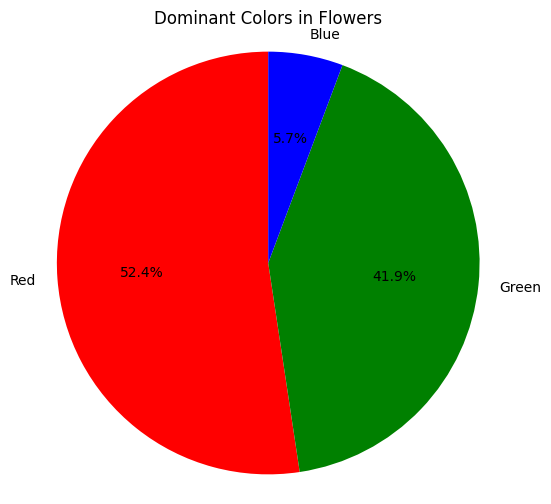

In [10]:
visualizer.plot_dominant_colors()     

##### Color Channel Distributions #####
Blue exhibited the greatest spread in mean intensity—appearing generally the darkest—while red showed the smallest variation and remained the brightest; green’s range and brightness fell between the two.

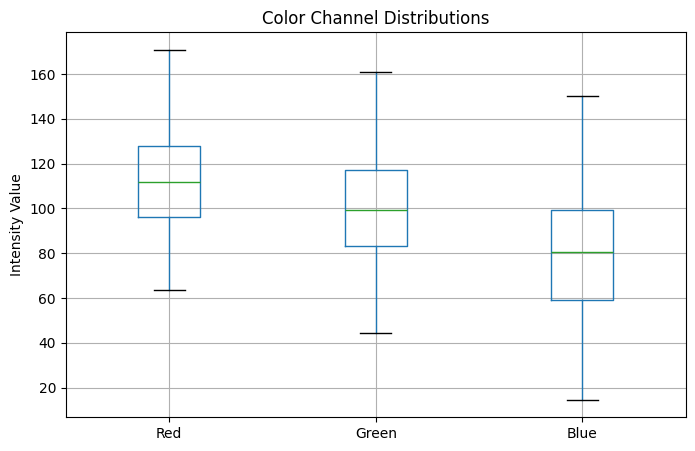

In [11]:
visualizer.plot_channel_means()        

##### Feature Correlations #####
Overall mean brightness rises and falls almost in lockstep with the individual channel means (most strongly blue) and moves oppositely to skewness. In contrast, both overall standard deviation and contrast exhibit only weak correlations, suggesting they capture different image characteristics.

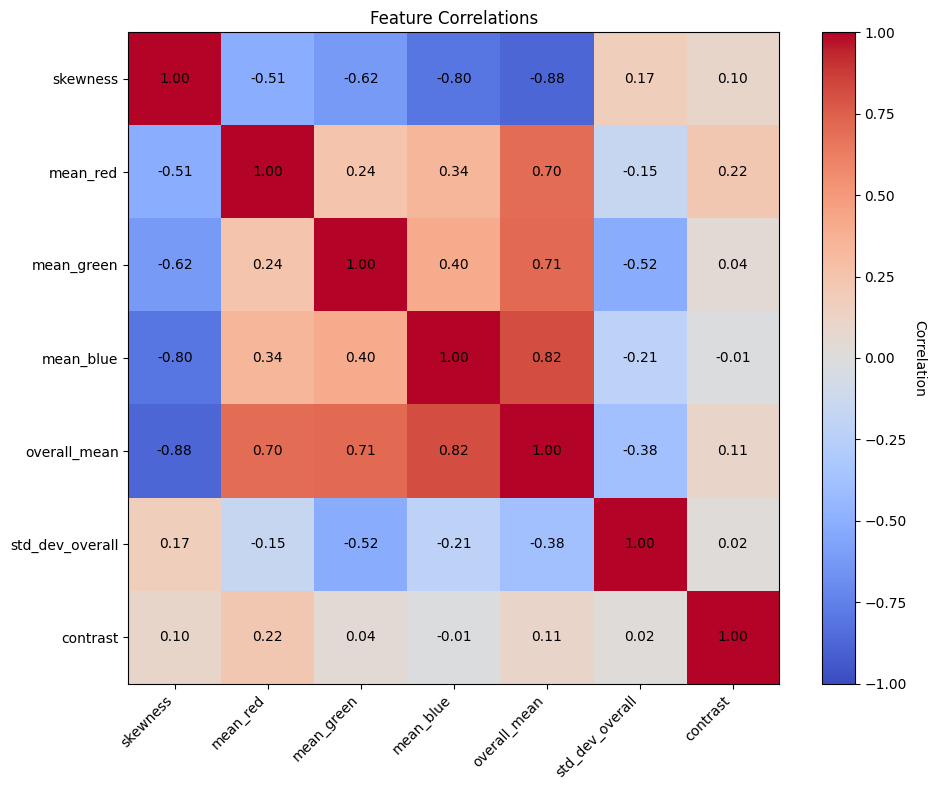

In [12]:
visualizer.plot_correlation_heatmap()   

##### Average Brightness by Dominant Color #####
Blue-dominant images are brightest on average, followed by red, with green-dominant images appearing darkest.

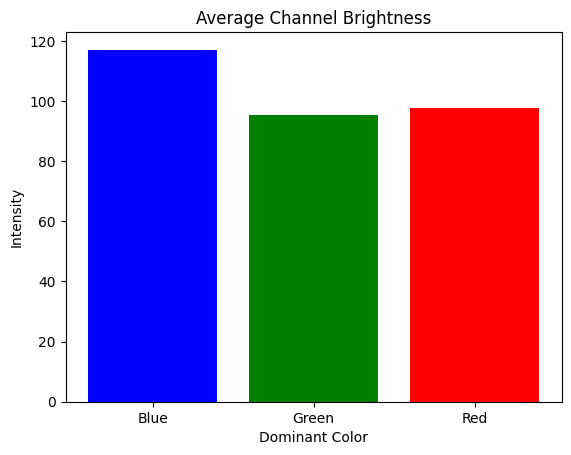

In [13]:
visualizer.plot_brightness_comparison() 

##### Color Contribution Across Images #####
Across the image series, the red channel consistently shows the highest ratio, the blue channel the lowest, and green remains in-between, with all three channels fluctuating noticeably from image to image.

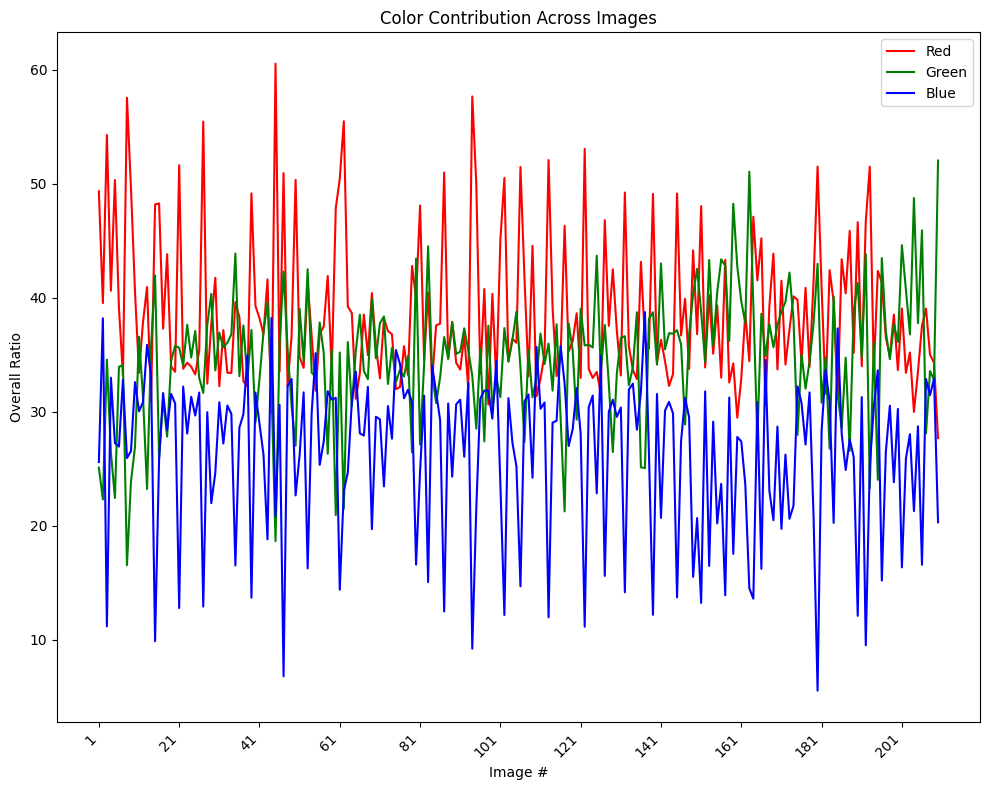

In [14]:
visualizer.plot_color_contribution()